# 02 — Sales KPIs & Trends (Monthly)

This notebook creates monthly KPIs from `fact_sales` and highlights month-over-month (MoM) trends. This is typical operational analytics work: monitoring revenue, orders, and units over time.

In [1]:
"""Repository bootstrap for notebooks and ad-hoc execution.

This module ensures the repository root (the directory containing 'src/') is added
to sys.path so that imports like `from src...` work reliably when running
notebooks from the /notebooks folder (or any subfolder inside the repo).
"""
import bootstrap


In [2]:
import sys
from pathlib import Path


In [3]:
import pandas as pd
import numpy as np

from src.io import load_sample, project_root
from src import quality
from src import kpi_metrics
from src.viz import line_chart, barh_top

dfs = load_sample()
fact = dfs["fact_sales"]
dim_customers = dfs["dim_customers"]
dim_products = dfs["dim_products"]
report_customers = dfs["report_customers"]
report_products = dfs["report_products"]

fact.head()


,order_number,product_key,customer_key,order_date,shipping_date,due_date,sales_amount,quantity,price
0,SO54496,282,5400,2013-03-16,2013-03-23,2013-03-28,25,1,25
1,SO54496,289,5400,2013-03-16,2013-03-23,2013-03-28,5,1,5
2,SO54496,259,5400,2013-03-16,2013-03-23,2013-03-28,2,1,2
3,SO54497,174,9281,2013-03-16,2013-03-23,2013-03-28,22,1,22
4,SO54497,280,9281,2013-03-16,2013-03-23,2013-03-28,9,1,9


In [4]:
# Schema validation (fail fast if inputs change)
from src.core.schema_checks import assert_required_columns, REQUIRED

assert_required_columns(fact, REQUIRED["fact_sales"], "fact_sales")
assert_required_columns(dim_customers, REQUIRED["dim_customers"], "dim_customers")
assert_required_columns(dim_products, REQUIRED["dim_products"], "dim_products")

In [5]:
kpis = kpi_metrics.monthly_kpis(fact)
kpis.head()


,year_month,revenue,orders,units,avg_price,aov,mom_revenue_pct,mom_orders_pct
0,2013-01,98307,189,459,218.260000,520.142857,NaN,NaN
1,2013-02,771218,1421,3454,223.344917,542.729064,684.499578,651.851852
2,2013-03,1049732,1690,4087,256.846587,621.143195,36.113524,18.930331
3,2013-04,1045860,1612,3979,262.844936,648.796526,-0.368856,-4.615385
4,2013-05,1284456,1792,4400,291.980223,716.772321,22.813378,11.166253


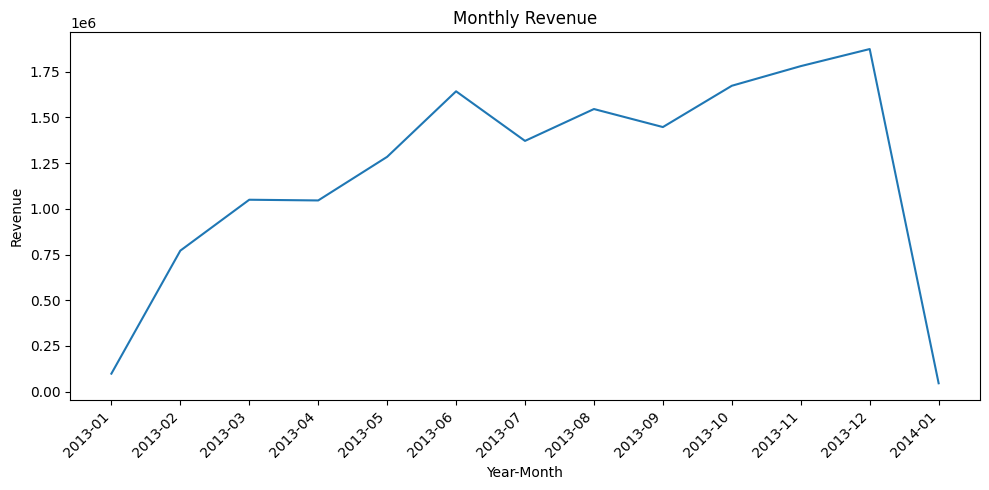

WindowsPath('C:/Users/uvcha/Python_Data_Analysis_Project_Fortis_Aligned_bootstrap/Python_Data_Analysis_Project_Fortis_Aligned/outputs/figures/monthly_revenue.png')

In [6]:
# Visual: Monthly revenue
fig_path = project_root() / "outputs/figures/monthly_revenue.png"
line_chart(kpis, "year_month", "revenue", "Monthly Revenue", xlabel="Year-Month", ylabel="Revenue", path=fig_path)
fig_path


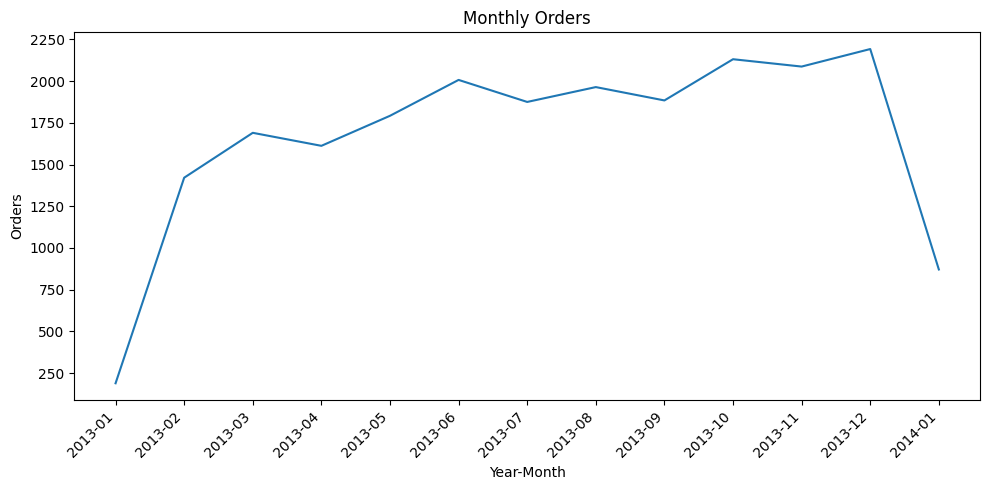

WindowsPath('C:/Users/uvcha/Python_Data_Analysis_Project_Fortis_Aligned_bootstrap/Python_Data_Analysis_Project_Fortis_Aligned/outputs/figures/monthly_orders.png')

In [7]:
# Visual: Monthly orders
fig_path = project_root() / "outputs/figures/monthly_orders.png"
line_chart(kpis, "year_month", "orders", "Monthly Orders", xlabel="Year-Month", ylabel="Orders", path=fig_path)
fig_path


In [8]:
# Export KPI table
out_path = project_root() / "outputs/tables/monthly_kpis.csv"
from pathlib import Path
Path(out_path).parent.mkdir(parents=True, exist_ok=True)
kpis.to_csv(out_path, index=False)
out_path


WindowsPath('C:/Users/uvcha/Python_Data_Analysis_Project_Fortis_Aligned_bootstrap/Python_Data_Analysis_Project_Fortis_Aligned/outputs/tables/monthly_kpis.csv')